In [135]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('df_master_3.csv')


In [137]:
df.drop('triage_pain', axis=1, inplace=True)

In [138]:
df.dropna(subset = ["age", "gender", 'triage_sbp_recoded', 'triage_dbp_recoded', 'triage_pain_recoded'], inplace = True)

In [139]:
df.rename(columns={'race_recoded': 'race', 'triage_temperature_recoded_2': 'triage_temperature','triage_heartrate_recoded': 'triage_heartrate',
                  'triage_resprate_recoded': 'triage_resprate','triage_o2sat_recoded': 'triage_o2sat','triage_sbp_recoded': 'triage_sbp',
                  'triage_dbp_recoded': 'triage_dbp','triage_pain_recoded': 'triage_pain'}, inplace=True)

In [140]:
variable = ["age", "gender", 
            
            "triage_temperature", "triage_heartrate", "triage_resprate", 
            "triage_o2sat", "triage_sbp", "triage_dbp", "triage_pain", "triage_acuity",
            
            "chiefcom_chest_pain", "chiefcom_abdominal_pain", "chiefcom_headache",
            "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
            "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope", 
            "chiefcom_dizziness", 
            
            "cci_MI", "cci_CHF", "cci_PVD", "cci_Stroke", "cci_Dementia", 
            "cci_Pulmonary", "cci_Rheumatic", "cci_PUD", "cci_Liver1", "cci_DM1", 
            "cci_DM2", "cci_Paralysis", "cci_Renal", "cci_Cancer1", "cci_Liver2", 
            "cci_Cancer2", "cci_HIV", 
            
            "eci_Arrhythmia", "eci_Valvular", "eci_PHTN",  "eci_HTN1", "eci_HTN2", 
            "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", 
            "eci_Obesity", "eci_WeightLoss", "eci_FluidsLytes", "eci_BloodLoss",
            "eci_Anemia", "eci_Alcohol", "eci_Drugs","eci_Psychoses", "eci_Depression",
            
            "n_ed_30d", "n_ed_90d", "n_ed_365d", "MAP"]

outcomes = ["outcome_hospitalization", "outcome_inhospital_mortality", "outcome_ed_revisit_3d"]

In [141]:
df_eda = df[variable + outcomes].copy()

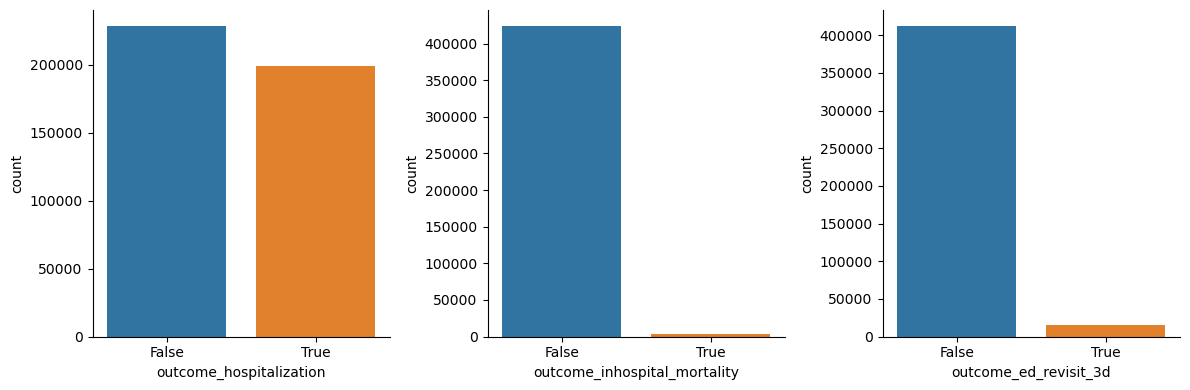

In [142]:
#distribution of outcome variables in data
g = sns.FacetGrid(pd.DataFrame(outcomes), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, outcome in zip(g.axes, outcomes):
    sns.countplot(data=df_eda, x=outcome, ax = ax)
    
g.tight_layout()
plt.show()

In [143]:
boolean_attributes = ["chiefcom_chest_pain", "chiefcom_abdominal_pain", "chiefcom_headache",
            "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
            "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope", 
            "chiefcom_dizziness"]


df_eda[boolean_attributes] = df_eda[boolean_attributes].replace({True: '1', False: '0'})

In [145]:
df_eda.to_csv(os.path.join(path, 'df_eda.csv'), index=False)

In [146]:
continuous_variables = ["age", "triage_temperature", "triage_heartrate", "triage_resprate", 
                        "triage_o2sat", "triage_sbp", "triage_dbp", "MAP"]
others = ["triage_pain", "triage_acuity", "n_ed_30d", "n_ed_90d", "n_ed_365d"]

In [168]:
numerical_attributes  = ["age",  
            
            "triage_temperature", "triage_heartrate", "triage_resprate", 
            "triage_o2sat", "triage_sbp", "triage_dbp", "triage_pain", "triage_acuity",
            
            "cci_MI", "cci_CHF", "cci_PVD", "cci_Stroke", "cci_Dementia", 
            "cci_Pulmonary", "cci_Rheumatic", "cci_PUD", "cci_Liver1", "cci_DM1", 
            "cci_DM2", "cci_Paralysis", "cci_Renal", "cci_Cancer1", "cci_Liver2", 
            "cci_Cancer2", "cci_HIV", 
            
            "eci_Arrhythmia", "eci_Valvular", "eci_PHTN",  "eci_HTN1", "eci_HTN2", 
            "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", 
            "eci_Obesity", "eci_WeightLoss", "eci_FluidsLytes", "eci_BloodLoss",
            "eci_Anemia", "eci_Alcohol", "eci_Drugs","eci_Psychoses", "eci_Depression",
                         
            "n_ed_30d", "n_ed_90d", "n_ed_365d", "MAP"]

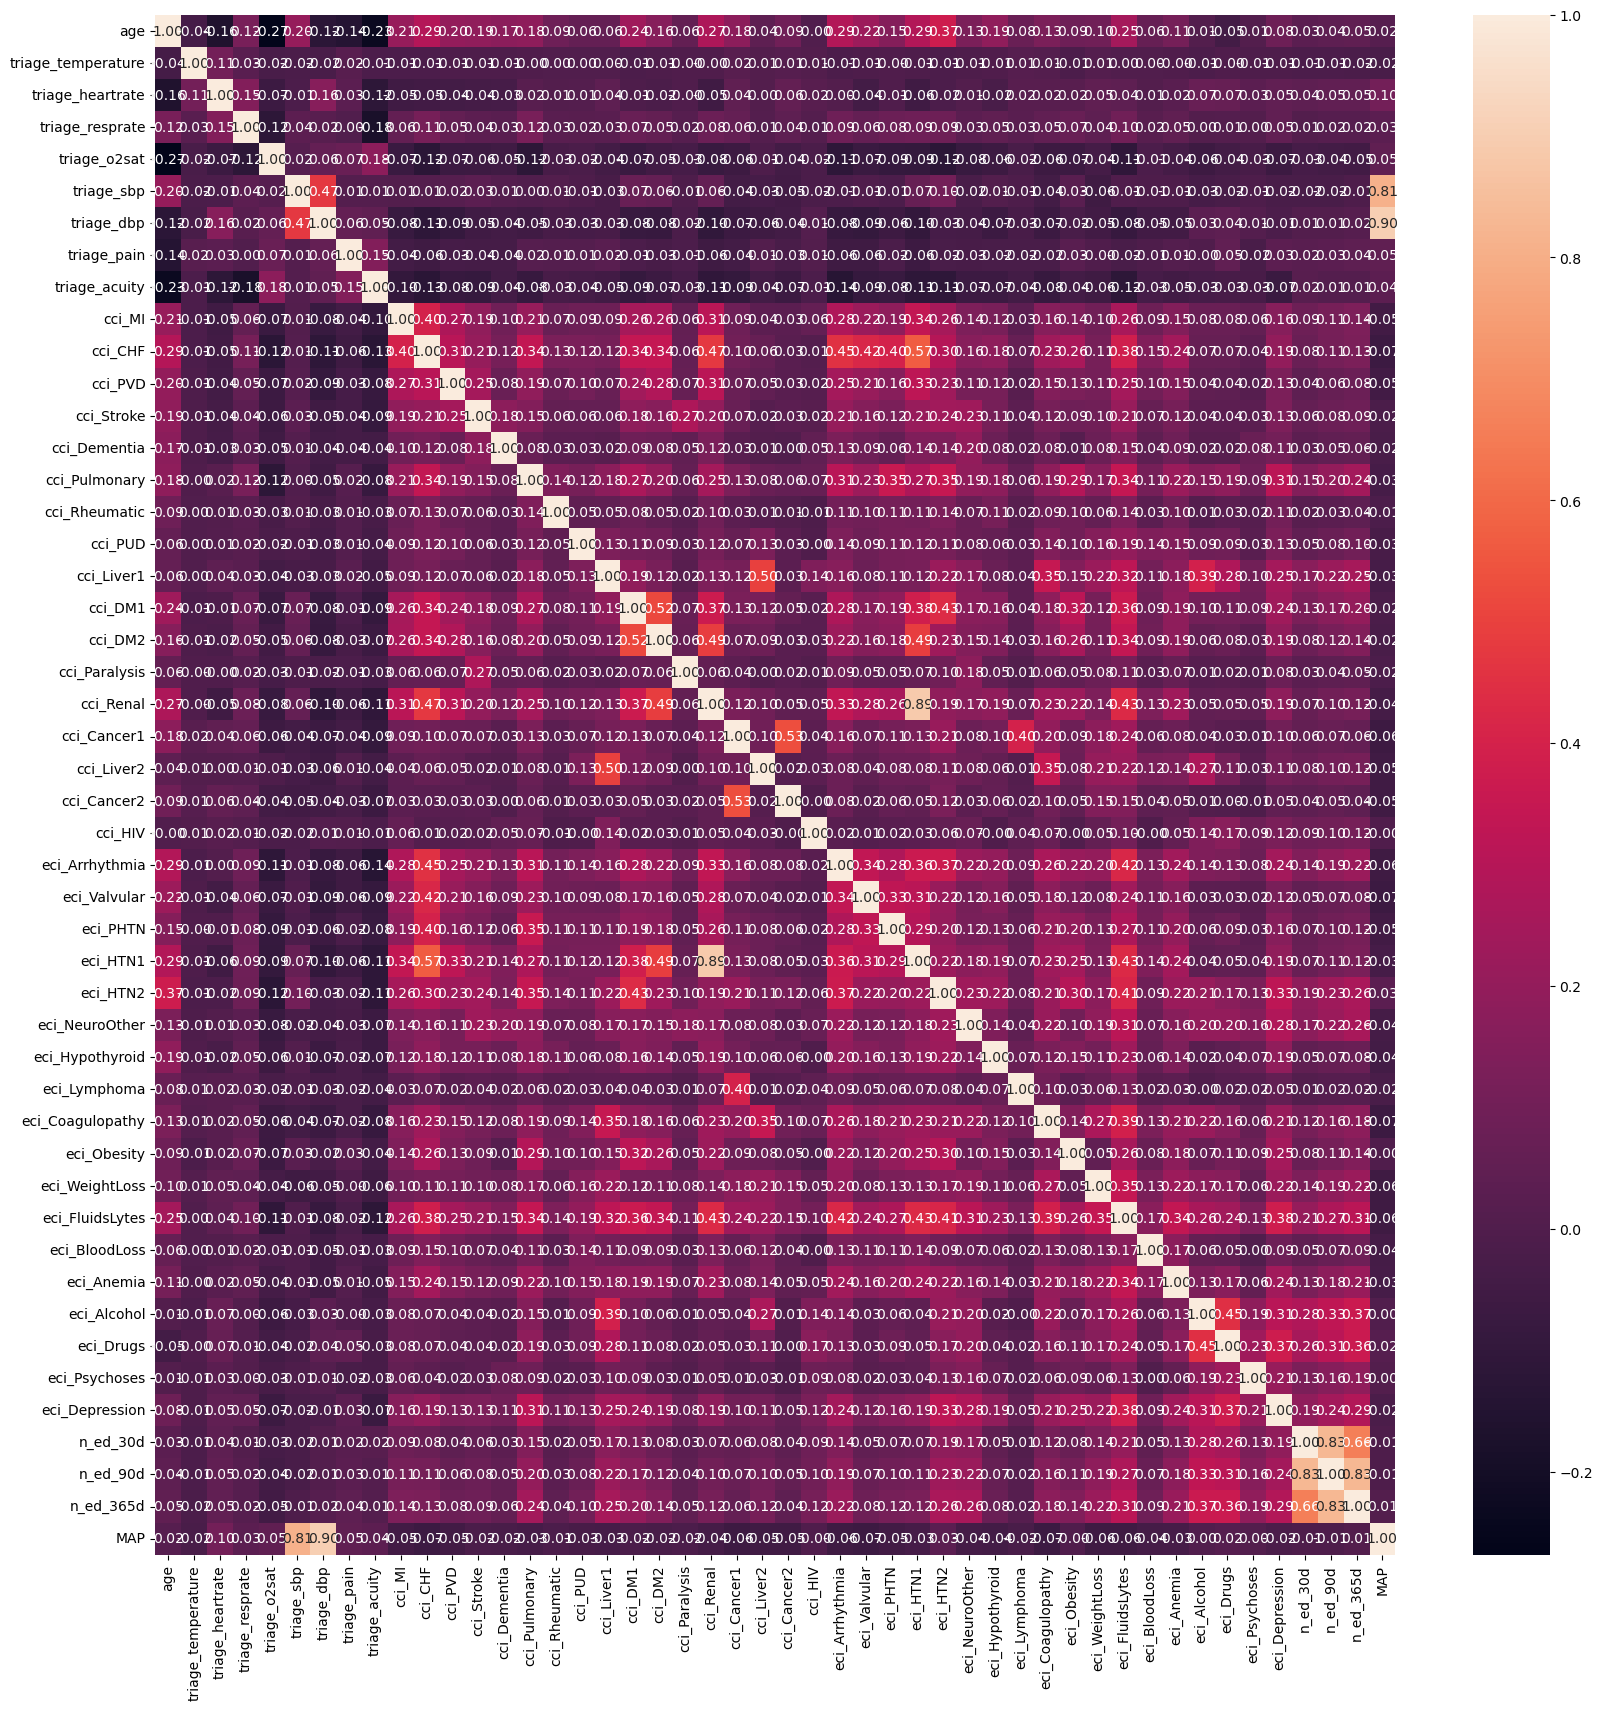

In [172]:
# Check for correlation among numerical attributes
corr = df_eda[numerical_attributes].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, annot = True, fmt=".2f")
plt.show()

## Outcome Hospitalization

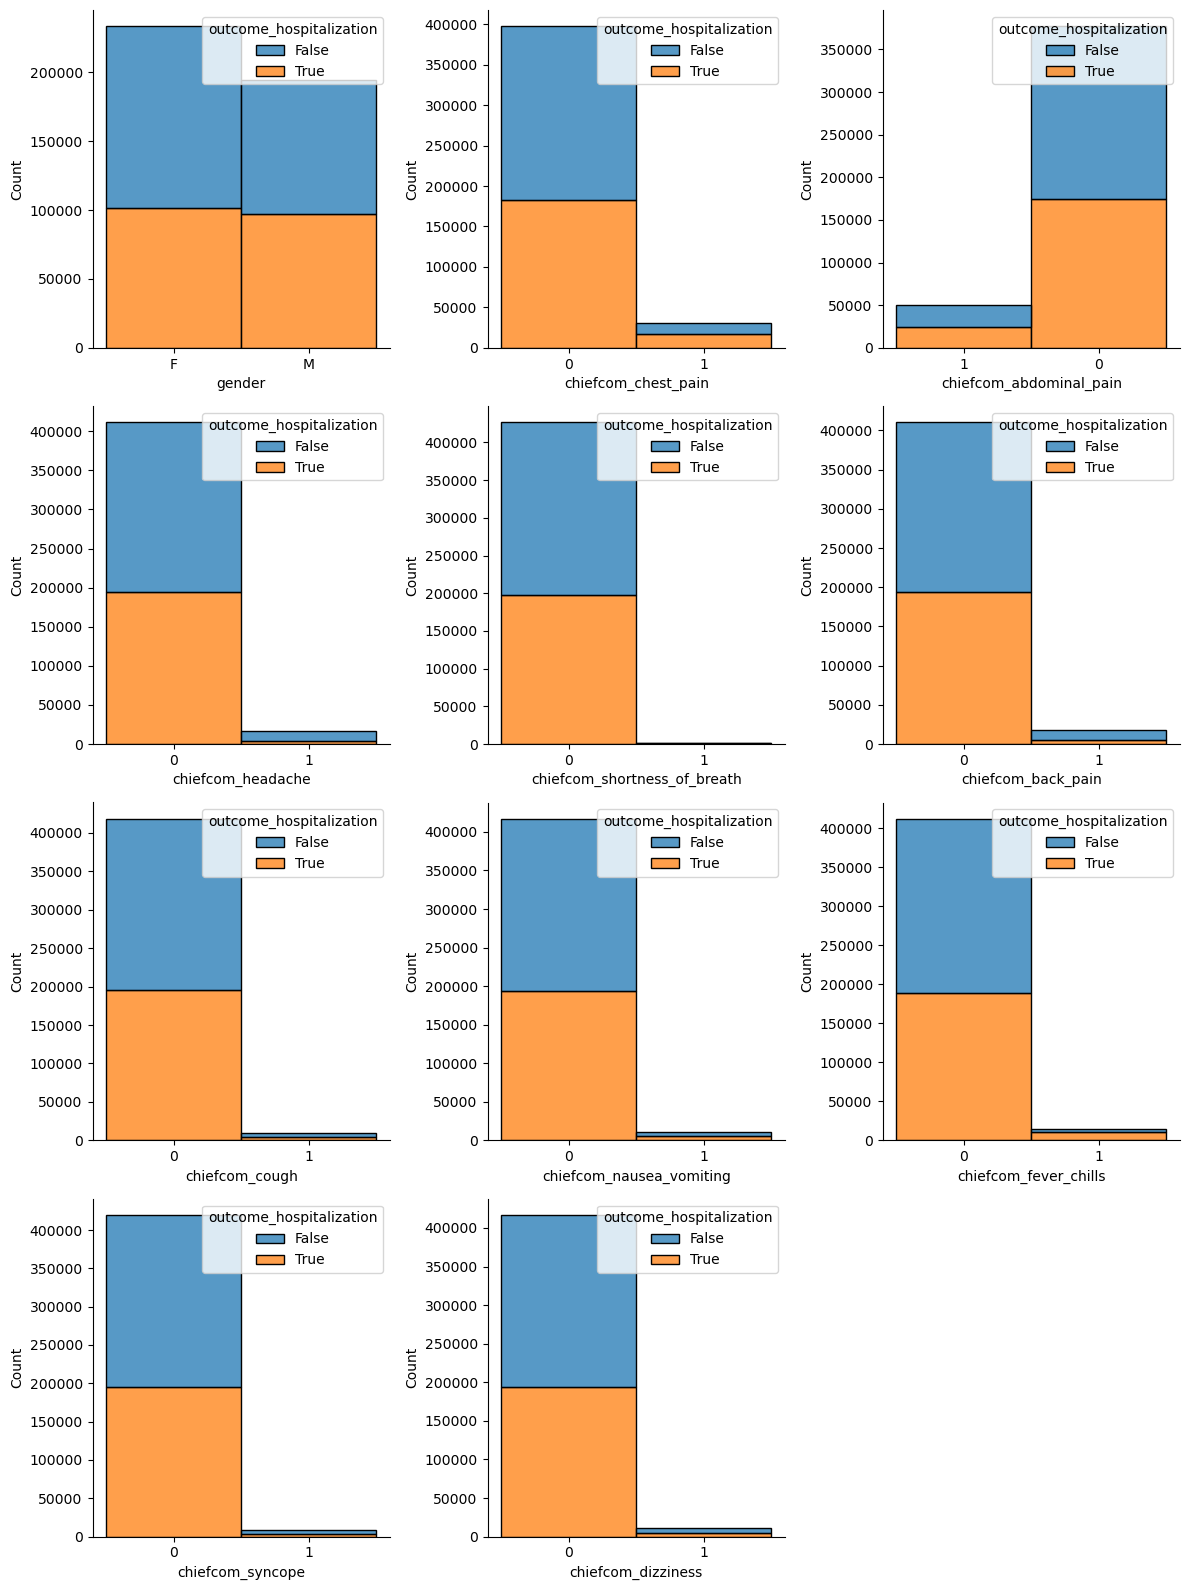

In [147]:
g = sns.FacetGrid(pd.DataFrame(['gender']+boolean_attributes), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, ['gender']+boolean_attributes):
    sns.histplot(data=df_eda, x=x_var, hue="outcome_hospitalization",multiple = "stack", ax=ax)

g.tight_layout()
plt.show()

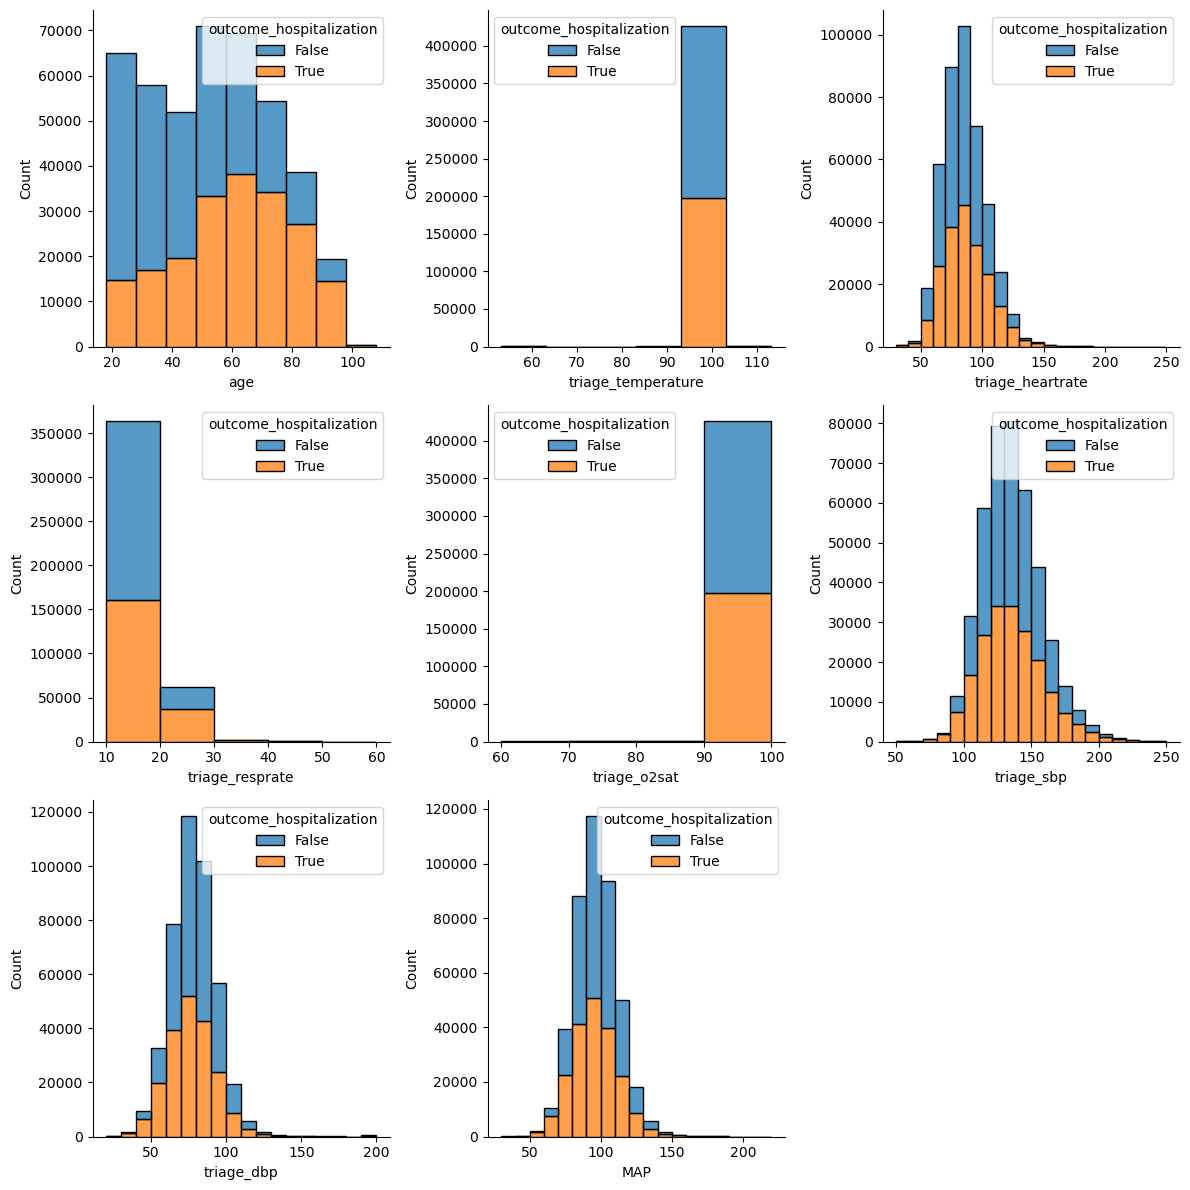

In [148]:
g = sns.FacetGrid(pd.DataFrame(continuous_variables), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, continuous_variables):
    sns.histplot(data=df_eda, x=x_var, hue="outcome_hospitalization",multiple = "stack", ax=ax, binwidth = 10)

g.tight_layout()
plt.show()

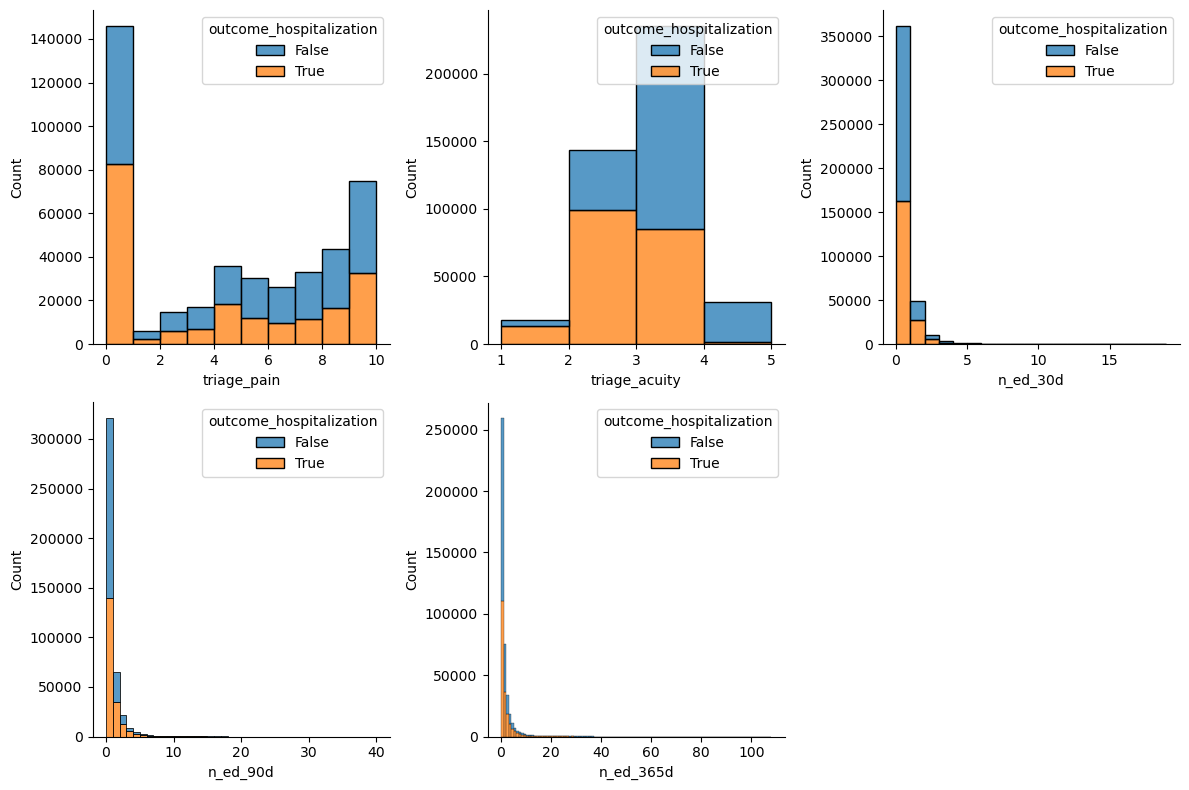

In [149]:
g = sns.FacetGrid(pd.DataFrame(others), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, others):
    sns.histplot(data=df_eda, x=x_var, hue="outcome_hospitalization",multiple = "stack", ax=ax, binwidth = 1)

g.tight_layout()
plt.show()

### outcome_inhospital_mortality

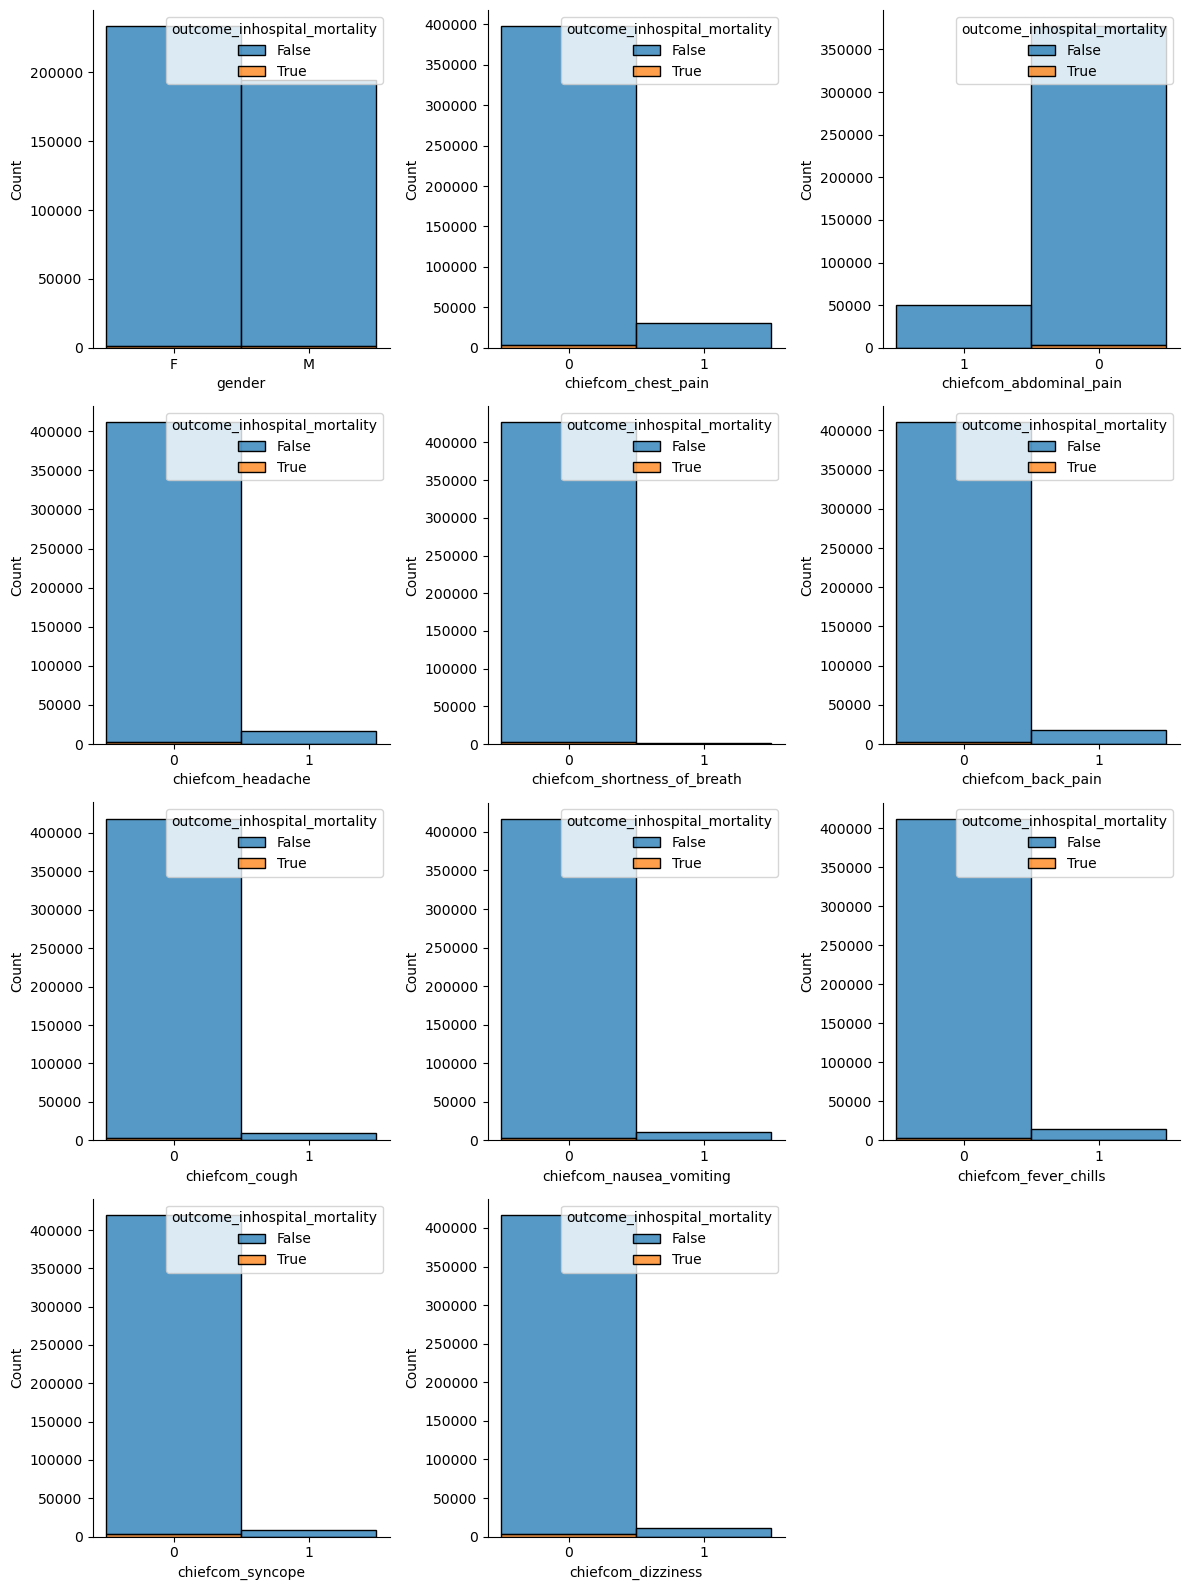

In [150]:
g = sns.FacetGrid(pd.DataFrame(['gender']+boolean_attributes), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, ['gender']+boolean_attributes):
    sns.histplot(data=df_eda, x=x_var, hue="outcome_inhospital_mortality",multiple = "stack", ax=ax)

g.tight_layout()
plt.show()

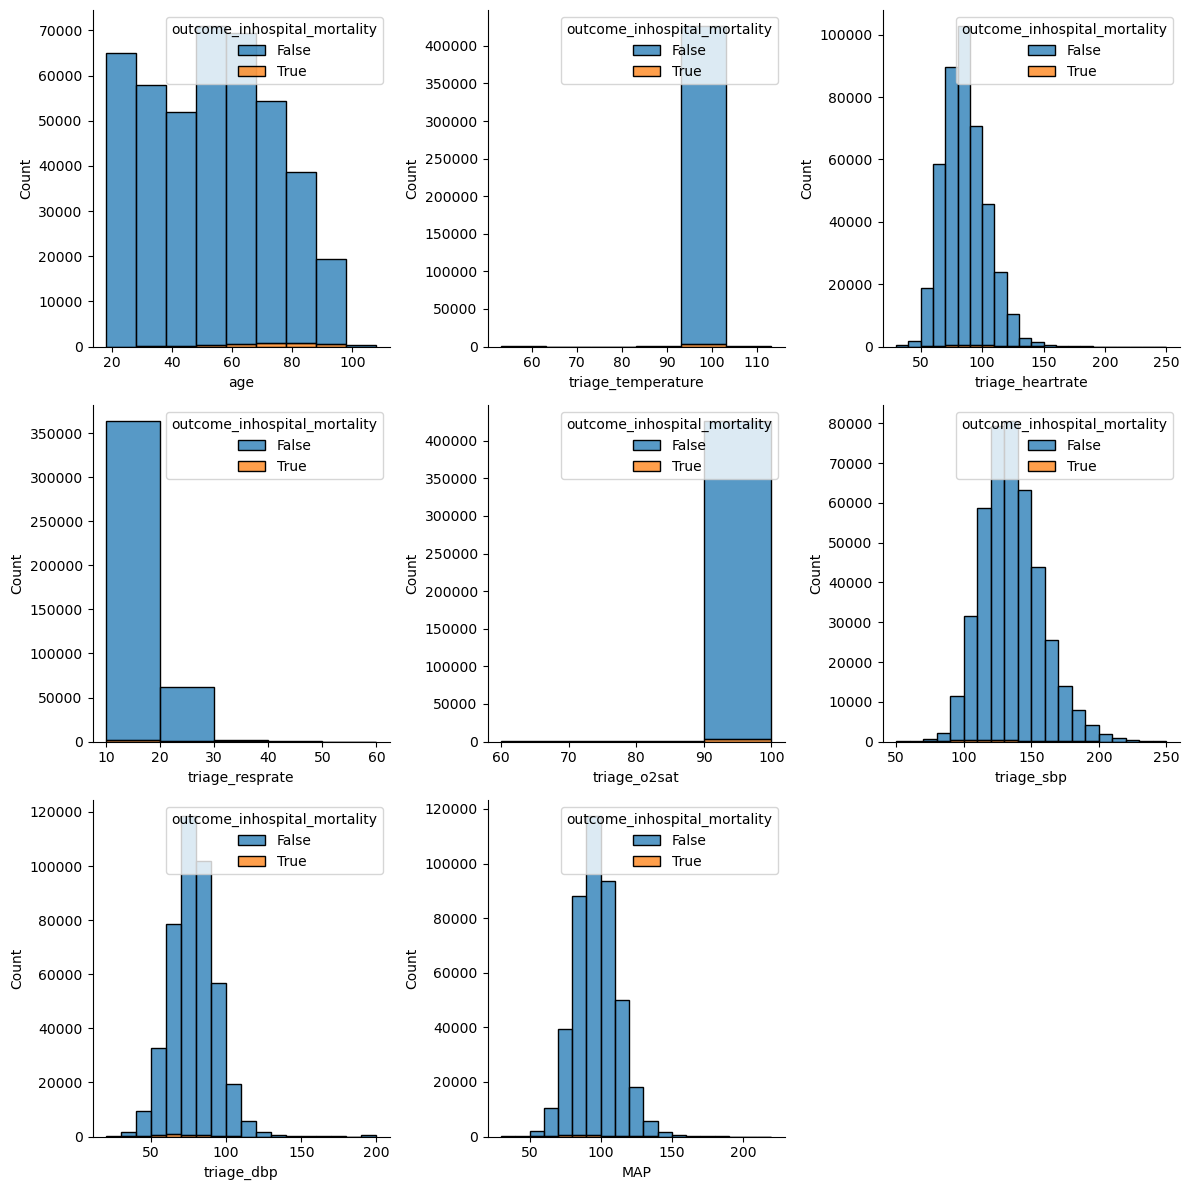

In [151]:
g = sns.FacetGrid(pd.DataFrame(continuous_variables), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, continuous_variables):
    sns.histplot(data=df_eda, x=x_var, hue="outcome_inhospital_mortality",multiple = "stack", ax=ax, binwidth = 10)

g.tight_layout()
plt.show()

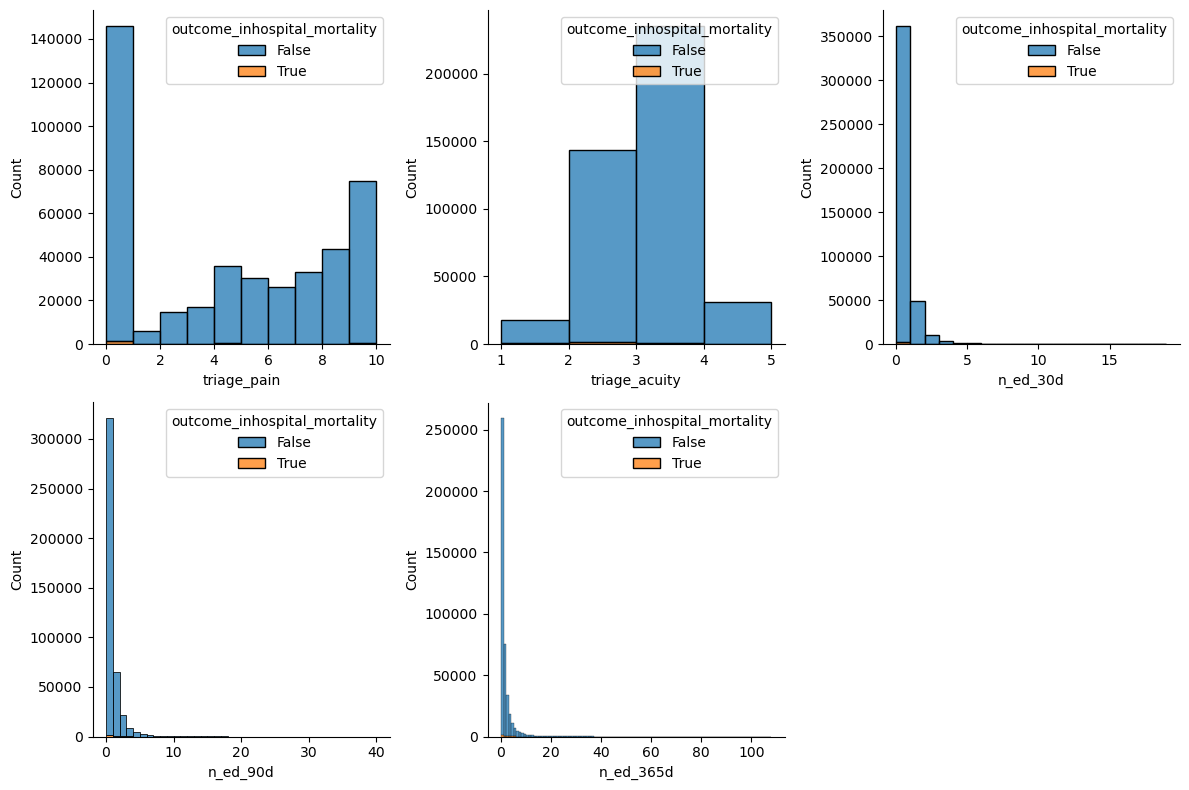

In [155]:
g = sns.FacetGrid(pd.DataFrame(others), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, others):
    sns.histplot(data=df_eda, x=x_var, hue="outcome_inhospital_mortality",multiple = "stack", ax=ax, binwidth = 1)

g.tight_layout()
plt.show()

### outcome_ed_revisit_3d

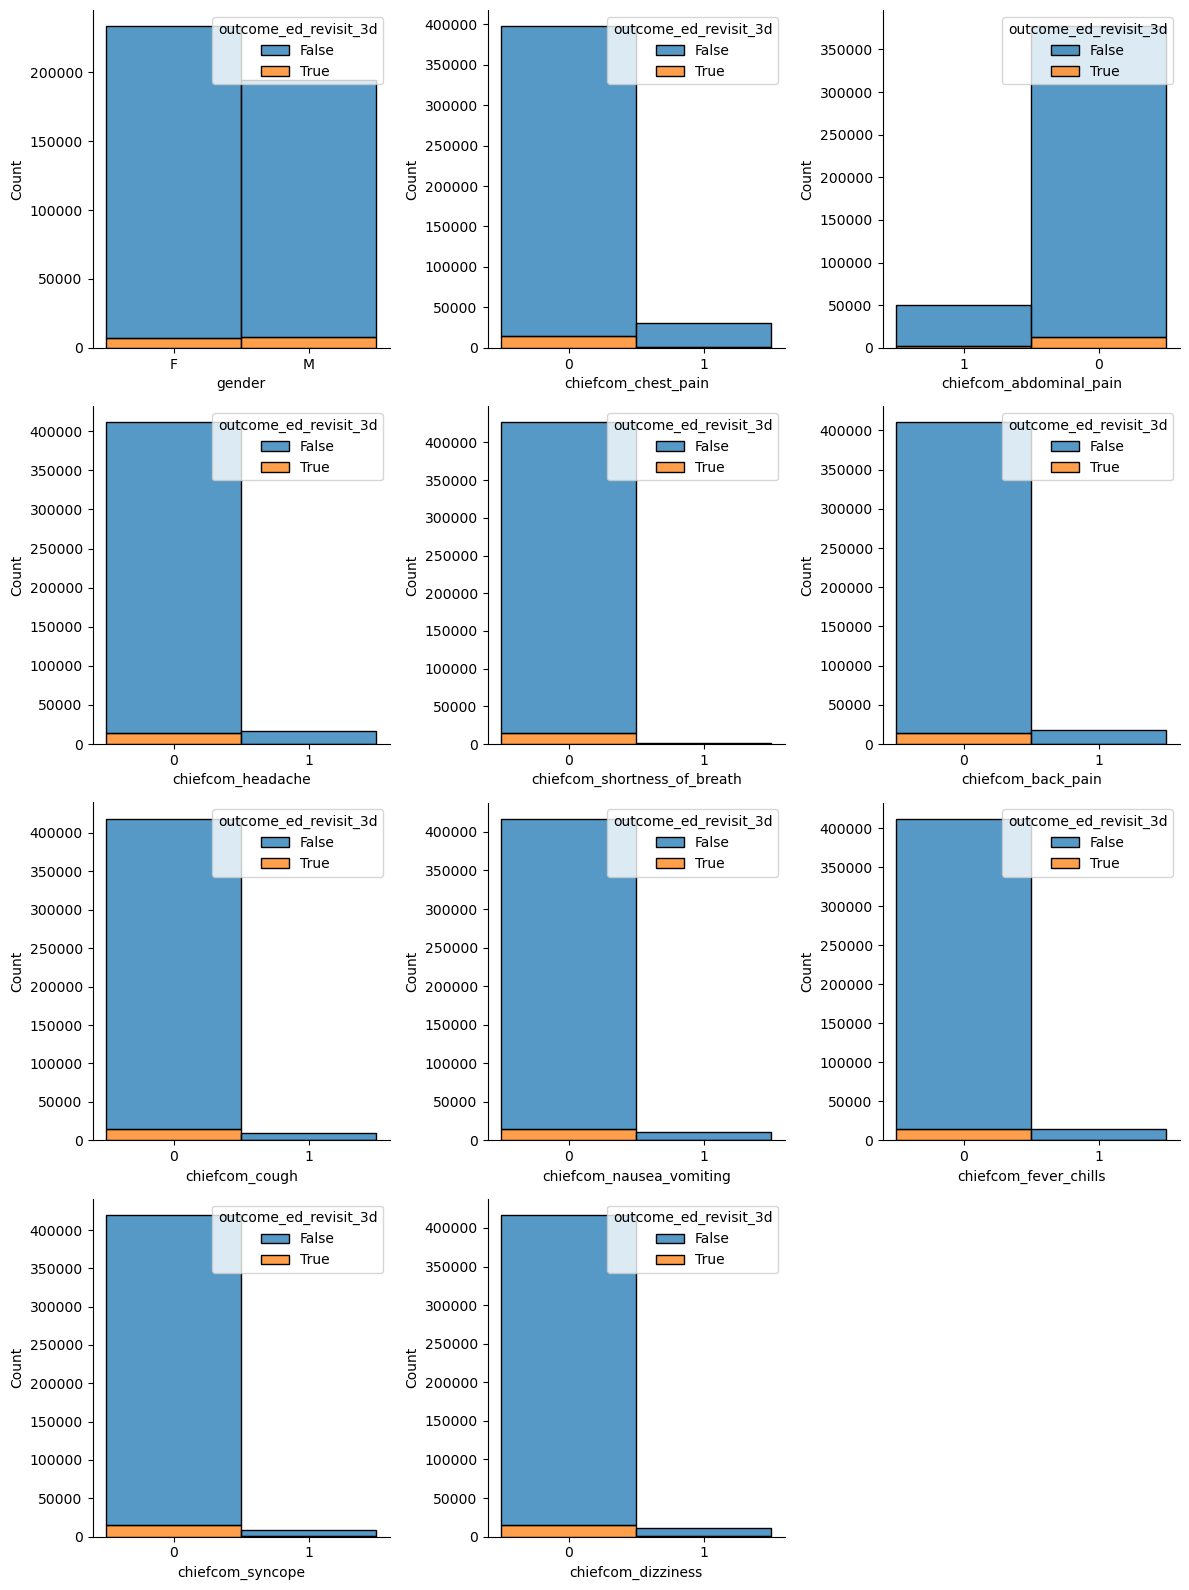

In [156]:
g = sns.FacetGrid(pd.DataFrame(['gender']+boolean_attributes), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, ['gender']+boolean_attributes):
    sns.histplot(data=df_eda, x=x_var, hue="outcome_ed_revisit_3d",multiple = "stack", ax=ax)

g.tight_layout()
plt.show()

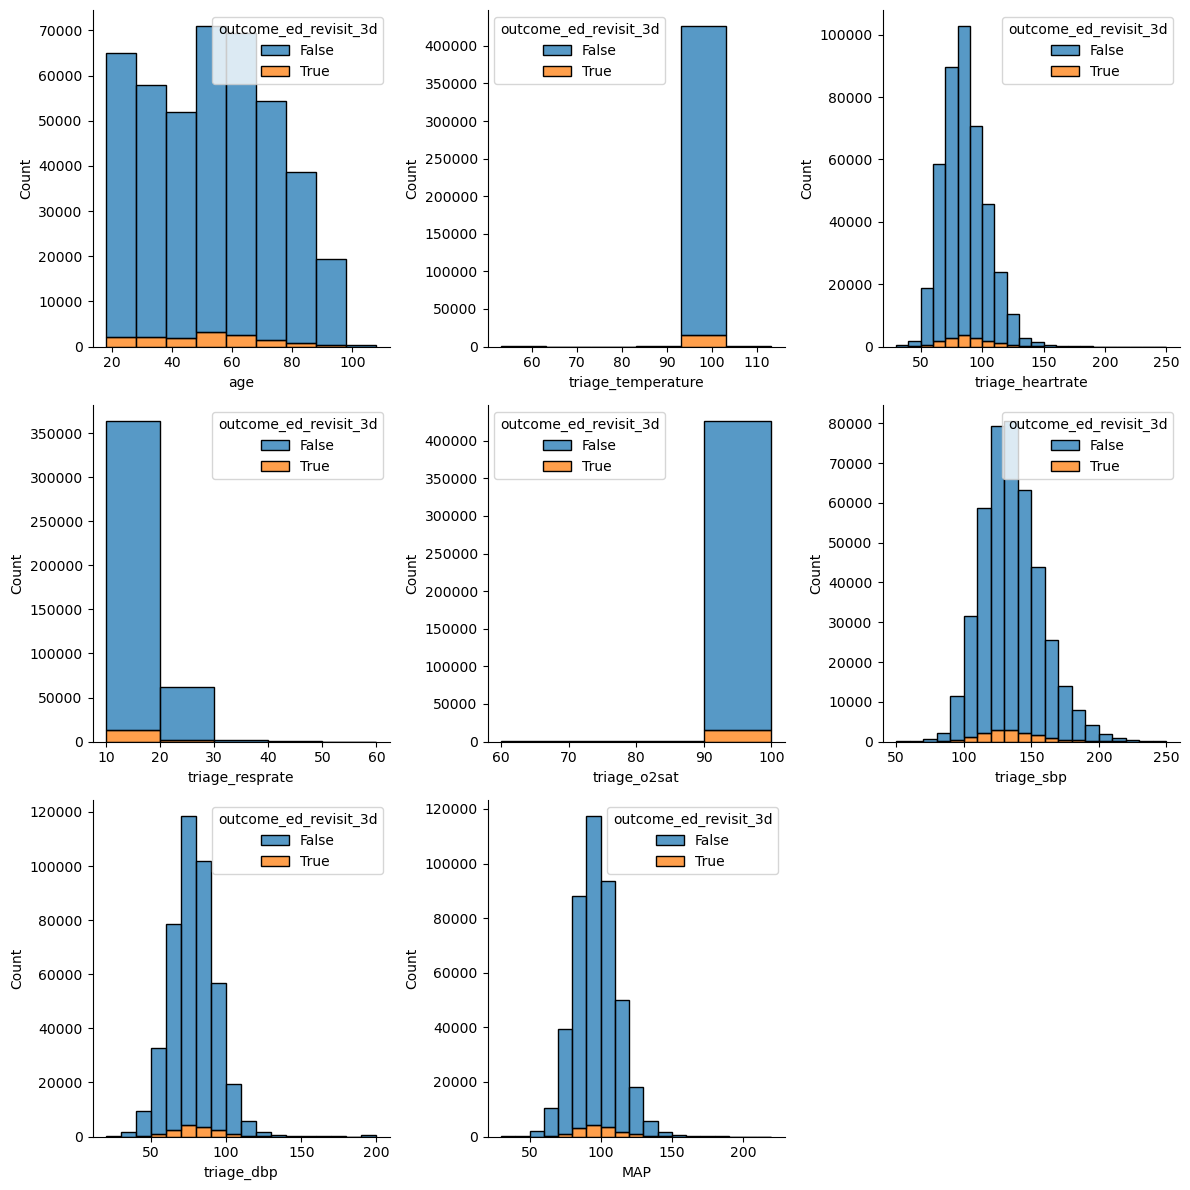

In [157]:
g = sns.FacetGrid(pd.DataFrame(continuous_variables), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, continuous_variables):
    sns.histplot(data=df_eda, x=x_var, hue="outcome_ed_revisit_3d",multiple = "stack", ax=ax, binwidth = 10)

g.tight_layout()
plt.show()

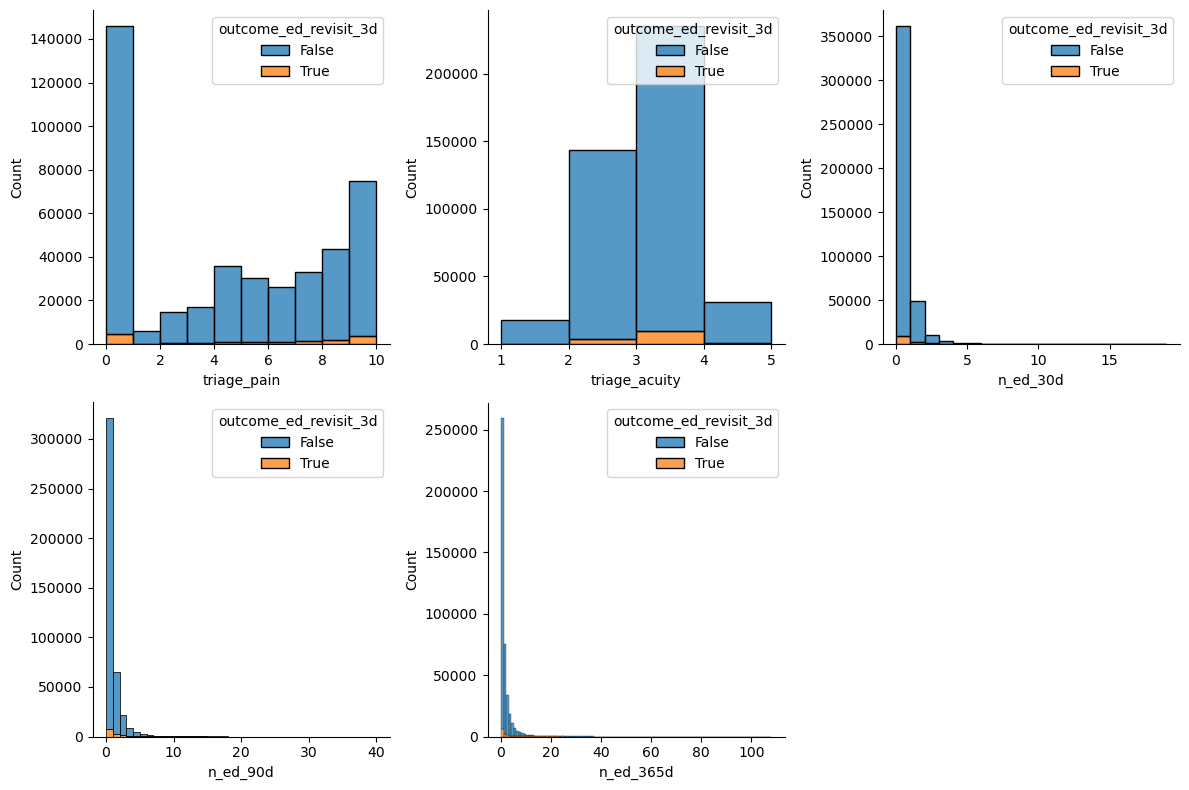

In [158]:
g = sns.FacetGrid(pd.DataFrame(others), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, others):
    sns.histplot(data=df_eda, x=x_var, hue="outcome_ed_revisit_3d",multiple = "stack", ax=ax, binwidth = 1)

g.tight_layout()
plt.show()

####   It is not possible to see the distribution for extreme values for temperature and O2 range because of the high count in normal range. So we set a y limit to see proportion of outcomes in the extreme ranges

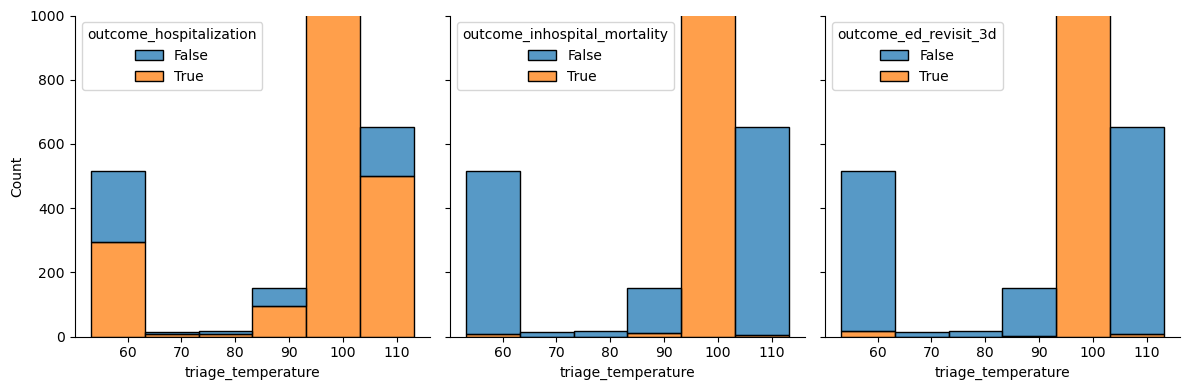

In [159]:
attributes = ["triage_temperature", "triage_o2sat"]
g = sns.FacetGrid(pd.DataFrame(outcomes), col=0, col_wrap=3, sharex=False, sharey=True, height=4)

for ax, outcome in zip(g.axes, outcomes):
        sns.histplot(data=df_eda, x="triage_temperature", multiple = "stack",hue = outcome, ax = ax, binwidth=10)

g.set(ylim=(0, 1000))
g.tight_layout()
plt.show()

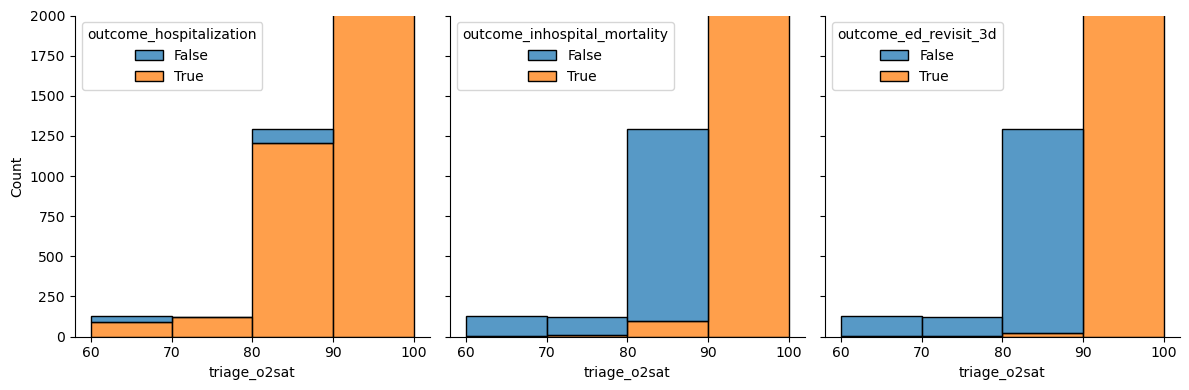

In [160]:
g = sns.FacetGrid(pd.DataFrame(outcomes), col=0, col_wrap=3, sharex=False, sharey=True, height=4)

for ax, outcome in zip(g.axes, outcomes):
        sns.histplot(data=df_eda, x="triage_o2sat", hue = outcome, multiple = "stack", ax = ax, binwidth=10)

g.set(ylim=(0, 2000))
g.tight_layout()
plt.show()

In [ ]:
# we can see that a large proportion of patients with O2 level below 90 are hospitalized and the corresponding inhospital
# mortality and ed revisit are low